In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import random
import sklearn
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage


#pd.options.display.max_rows = 9000
pd.options.display.max_columns = 90
cards = pd.read_csv("Card_tidy.csv", index_col=0)
cards = cards.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [2]:
cards["Banlist"] = np.where(cards["TCG_Banlist"] != "Unlimited", True, False)
cards

,Card_set,Card_number,Rarity,Card_name,Card_type,Attribute,ATK,DEF,Level,Link_no,Property,M_type1,M_type2,M_type3,M_type4,E_type1,E_type2,E_type3,E_type4,E_type5,E_type6,E_type7,E_type8,E_type9,E_type10,TCG_Banlist,Banlist
0,Metal Raiders,MRD-116,Rare,Witch of the Black Forest,Monster,DARK,1100,1200,4.0,None,NaN,Spellcaster,Effect,None,None,Trigger,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
1,Photon Shockwave,PHSW-EN014,Common,Plasma Ball,Monster,LIGHT,900,900,3.0,None,NaN,Thunder,Effect,None,None,Continuous,Trigger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
2,Rise of the Duelist,ROTD-EN030,Ultra Rare,Koa'ki Meiru Supplier,Monster,EARTH,1400,1600,4.0,None,NaN,Rock,Effect,None,None,Trigger,Trigger,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
3,Pharaonic Guardian,PGD-093,Rare,Coffin Seller,Trap,NaN,NaN,None,NaN,None,Continuous,NaN,None,None,None,Trigger-like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
4,Rising Rampage,RIRA-EN060,Common,"Elborz, the Sacred Lands of Simorgh",Spell,NaN,NaN,None,NaN,None,Field,NaN,None,None,None,Continuous-like,Condition,Ignition-like,Ignition-like,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,The Dark Illusion,TDIL-EN004,Common,Performapal Inflater Tapir,Monster,WIND,1000,2000,6.0,None,NaN,Beast,Effect,None,None,Quick,Trigger,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
8323,Light of Destruction,LODT-EN039,Rare,"Simorgh, Bird of Ancestry",Monster,WIND,2900,2000,8.0,None,NaN,Winged Beast,Effect,None,None,Continuous,Trigger,Unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
8324,Dawn of Majesty,DAMA-EN066,Secret Rare,Ready Fusion,Spell,NaN,NaN,None,NaN,None,Normal,NaN,None,None,None,Cost,Effect,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
8325,Maximum Crisis,MACR-EN079,Secret Rare,Unending Nightmare,Trap,NaN,NaN,None,NaN,None,Continuous,NaN,None,None,None,Quick-like,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False


In [3]:
monster_cards = cards.loc[cards["Card_type"] == "Monster"] # Pick  monster only
attribute = pd.unique(monster_cards["Attribute"])
count_attr = monster_cards.groupby("Attribute").size()
re_order_attr = [0, 6, 2, 4, 1, 5, 3]
attribute = [attribute[i] for i in re_order_attr] # Reorder attribute

In [4]:
#all card types chart data
card_type = pd.unique(cards["Card_type"])
count_type = cards.groupby("Card_type").size()

([<matplotlib.patches.Wedge at 0x2bb2fcdf7f0>,
 [Text(-0.5009676683008037, 1.0904271618577996, 'Monster'),
  Text(-0.09636510346904315, -1.095770855075732, 'Spell'),
  Text(0.9554854186302266, -0.5450207471142916, 'Trap')],
 [Text(-0.29223113984213545, 0.6360825110837165, '63.7%'),
  Text(-0.05256278371038716, -0.5976931936776719, '19.8%'),
  Text(0.5211738647073964, -0.29728404388052265, '16.5%')])

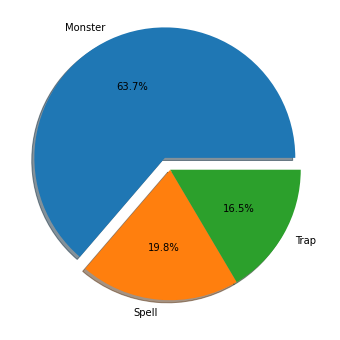

In [5]:
#all card types chart
plt.figure(figsize=(6, 6))
plt.pie(count_type,labels = ["Monster", "Spell", "Trap"], explode = [0.1, 0 , 0]
        , autopct='%1.1f%%', shadow = True)

[Text(0, 0, '1436'),
 Text(0, 0, '1'),
 Text(0, 0, '1292'),
 Text(0, 0, '457'),
 Text(0, 0, '1070'),
 Text(0, 0, '517'),
 Text(0, 0, '532')]

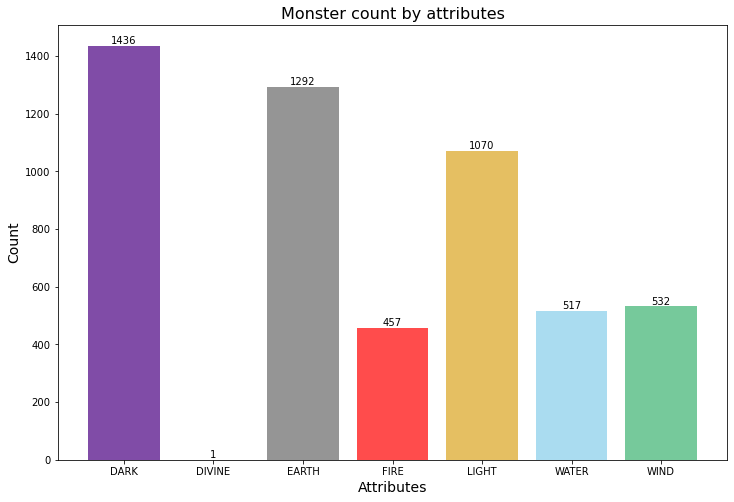

In [6]:
# Plot of monster attributes
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
att_plot = ax.bar(attribute, count_attr, alpha = 0.7, 
        color = ["indigo", "gold", "dimgray", "red", "goldenrod", "skyblue", "mediumseagreen"])
ax.set_title("Monster count by attributes", size = 16)
ax.set_xlabel("Attributes", size = 14)
ax.set_ylabel("Count", size = 14)
ax.bar_label(att_plot)



In [7]:
# Monster by type data
mons_type = pd.unique(monster_cards["M_type1"])
count_mons_type = monster_cards.groupby("M_type1").size()
mons_type = np.sort(mons_type)

[Text(0, 0, '155'),
 Text(0, 0, '274'),
 Text(0, 0, '172'),
 Text(0, 0, '154'),
 Text(0, 0, '75'),
 Text(0, 0, '1'),
 Text(0, 0, '416'),
 Text(0, 0, '335'),
 Text(0, 0, '500'),
 Text(0, 0, '86'),
 Text(0, 0, '176'),
 Text(0, 0, '609'),
 Text(0, 0, '150'),
 Text(0, 0, '130'),
 Text(0, 0, '70'),
 Text(0, 0, '112'),
 Text(0, 0, '162'),
 Text(0, 0, '55'),
 Text(0, 0, '435'),
 Text(0, 0, '90'),
 Text(0, 0, '665'),
 Text(0, 0, '219'),
 Text(0, 0, '90'),
 Text(0, 0, '174')]

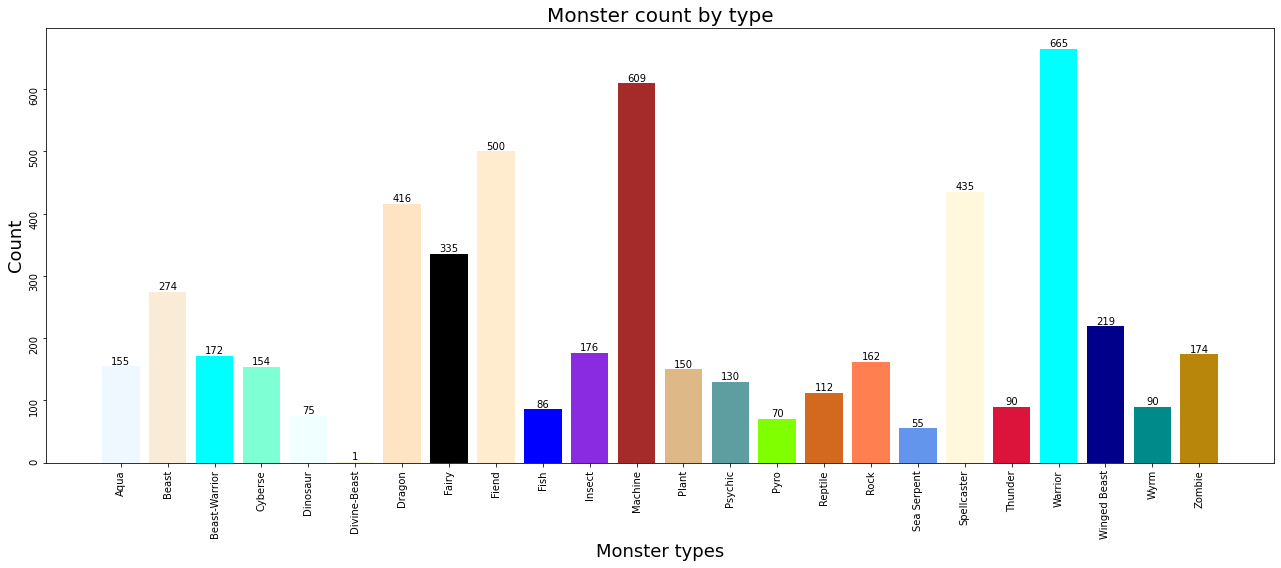

In [8]:
# Plot of monsters types
#number_of_colors = 22
#rando = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             #for i in range(number_of_colors)]
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(22)
mons_type_plot = ax.bar(mons_type, count_mons_type, alpha = 1, color =  mcolors.CSS4_COLORS)

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 16}
ax.set_title("Monster count by type", size = 20)
ax.set_xlabel("Monster types", size = 18)
ax.tick_params(labelrotation=90)
ax.set_ylabel("Count", size = 18)
ax.bar_label(mons_type_plot)

In [9]:
# Data for all dif card colors
cards_color_all = ["Ritual", "Fusion", "Link", "Synchro", "Xyz", "Pendulum"]
ritual_mons = monster_cards[monster_cards["M_type2"] == "Ritual"]
fusion_mons = monster_cards[monster_cards["M_type2"] == "Fusion"]
link_mons = monster_cards[monster_cards["M_type2"] == "Link"]
synchro_mons = monster_cards[monster_cards["M_type2"] == "Synchro"]
xyz_mons = monster_cards[monster_cards["M_type2"] == "Xyz"]
pendulum_mons = monster_cards[monster_cards["M_type2"] == "Pendulum"]
cards_color_list = [ritual_mons, fusion_mons, link_mons, synchro_mons, xyz_mons, pendulum_mons]
count_card_color = []
for i in cards_color_list:
    count_card_color.append(len(i))
count_card_color

[65, 256, 224, 250, 306, 197]

[Text(0, 0, '65'),
 Text(0, 0, '256'),
 Text(0, 0, '224'),
 Text(0, 0, '250'),
 Text(0, 0, '306'),
 Text(0, 0, '197')]

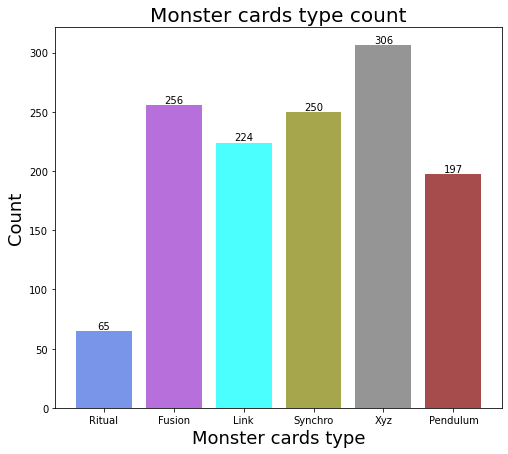

In [10]:
# plot of monster card type
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(8)
mct_plot = ax.bar(cards_color_all, count_card_color, alpha = 0.7,
       color = ["royalblue", "darkorchid", "aqua", "olive", "dimgrey", "maroon"])
ax.set_title("Monster cards type count", size = 20)
ax.set_xlabel("Monster cards type", size = 18)
ax.set_ylabel("Count", size = 18)
ax.bar_label(mct_plot)


In [11]:
#Monster by levels, excluding links monster since links has no levels
non_link_mons = monster_cards[monster_cards["M_type2"] != "Link"]
mons_lv_array = []
for i in range(1, 13):
    mons_lv_array.append(len(non_link_mons[non_link_mons["Level"] == i]))
mons_lv_array
one_to_12 = list(range(1, 13))
str(one_to_12)

'[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]'

[Text(0, 0, '426'),
 Text(0, 0, '434'),
 Text(0, 0, '805'),
 Text(0, 0, '1637'),
 Text(0, 0, '405'),
 Text(0, 0, '399'),
 Text(0, 0, '308'),
 Text(0, 0, '415'),
 Text(0, 0, '89'),
 Text(0, 0, '122'),
 Text(0, 0, '21'),
 Text(0, 0, '20')]

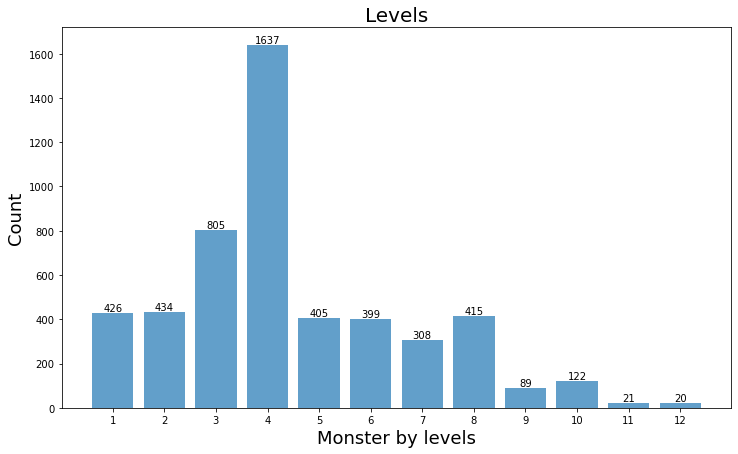

In [12]:
#Monster by level plot, excluding links monster since links has no levels 
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(12)
mbl_plot = ax.bar(one_to_12, mons_lv_array, alpha = 0.7) #color = ["royalblue", "darkorchid", "aqua", "olive", "dimgrey", "maroon"])
ax.set_title("Levels", size = 20)
ax.set_xlabel("Monster by levels", size = 18)
ax.set_ylabel("Count", size = 18)
ax.set_xticks(ticks = one_to_12)
ax.bar_label(mbl_plot)

In [13]:
#ATK and DEK Distribution, excluding links since no DEF value, excluding cards with "?" ATK/DEF
non_link_zero_mons = non_link_mons[non_link_mons["ATK"] != "?"]
non_link_zero_mons = non_link_zero_mons[non_link_zero_mons["DEF"] != "?"]
ATK_all = non_link_zero_mons["ATK"].astype(float)
DEF_all = non_link_zero_mons["DEF"].astype(float)

In [14]:
#Plot ATK and DEF distribution
#fig, ax = plt.subplots()
#fig.set_figheight(6)
#fig.set_figwidth(10)
#ax.scatter(ATK_all, DEF_all, alpha = 0.4)
#ax.grid()
#ax.set_title("Distribution of ATK power vs DEF power", size = 18)
#ax.set_xlabel("Attack", size = 16)
#ax.set_ylabel("Defense", size = 16)

Text(0, 0.5, 'Defense')

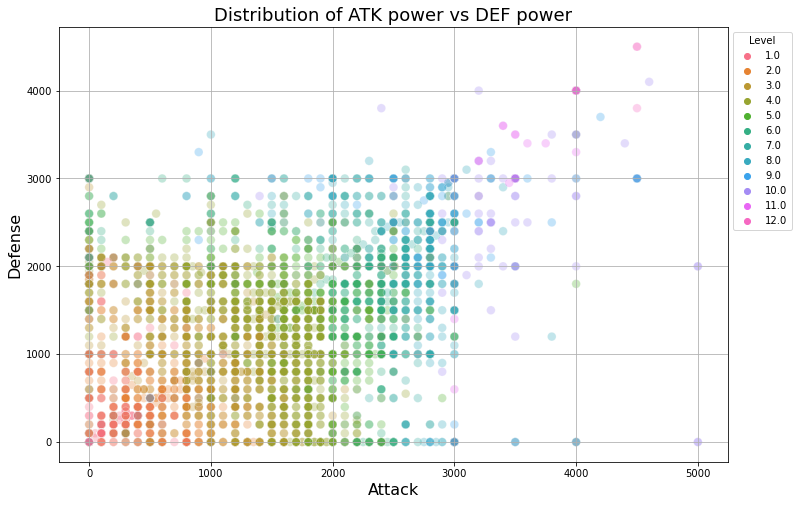

In [15]:
#Plot ATK and DEF distribution with lvl
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
lv_label = non_link_zero_mons["Level"].sort_values().astype(str)
sns.scatterplot(data =non_link_zero_mons, 
                x = ATK_all, y = DEF_all, alpha = 0.3, 
                hue = lv_label, 
                hue_order = ["1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","9.0","10.0","11.0","12.0"],  s = 75)
ax.grid()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Distribution of ATK power vs DEF power", size = 18)
ax.set_xlabel("Attack", size = 16)
ax.set_ylabel("Defense", size = 16)

In [16]:
#ATK and DEF base on levels
non_link_zero_mons["ATK"] = non_link_zero_mons["ATK"].astype(float)
non_link_zero_mons["DEF"] = non_link_zero_mons["DEF"].astype(float)
non_link_zero_mons["Level"] = non_link_zero_mons["Level"].astype(float)
lv_atk_list = [[]]
lv_atk_list[0] = non_link_zero_mons["ATK"][non_link_zero_mons["Level"] == 1]
lv_def_list = [[]]
lv_def_list[0] = non_link_zero_mons["DEF"][non_link_zero_mons["Level"] == 1]
for i in range(2,13):
    lv_atk_list.append(non_link_zero_mons["ATK"][non_link_zero_mons["Level"] == i])
lv_atk_list[11]
for i in range(2, 13):
    lv_def_list.append(non_link_zero_mons["DEF"][non_link_zero_mons["Level"] == i])

Text(0, 0.5, 'Attack')

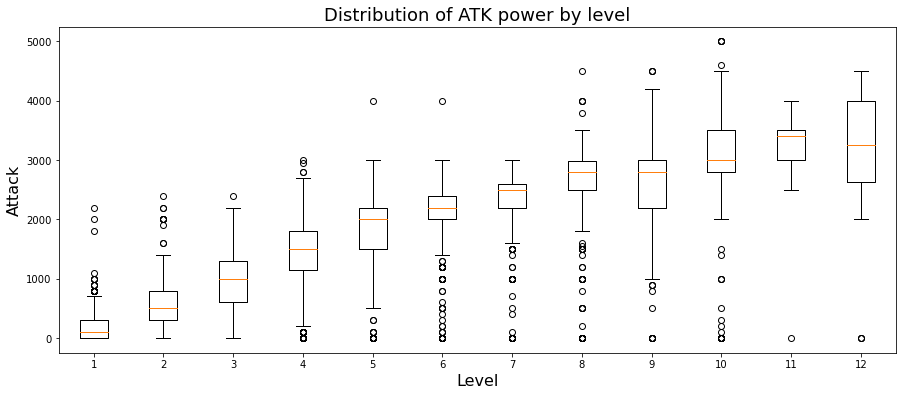

In [17]:
# Attack power by lv plot
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
for i in range(1,13): 
    ax.boxplot(lv_atk_list[i-1], positions = [i], widths = 0.4)
ax.set_title("Distribution of ATK power by level", size = 18)
ax.set_xlabel("Level", size = 16)
ax.set_ylabel("Attack", size = 16)

Text(0, 0.5, 'Defense')

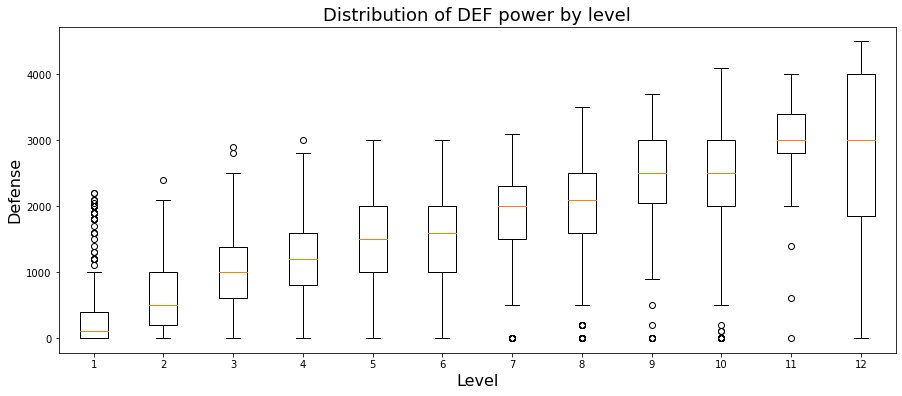

In [18]:
# Defense power by lv plot
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
for i in range(1,13): 
    ax.boxplot(lv_def_list[i-1], positions = [i], widths = 0.4)
ax.set_title("Distribution of DEF power by level", size = 18)
ax.set_xlabel("Level", size = 16)
ax.set_ylabel("Defense", size = 16)

In [19]:
#banlist vs mons lv data
mons_lv_ban = non_link_mons[["Level", "Banlist"]]
mons_lv_ban

,Level,Banlist
0,4.0,False
1,3.0,False
2,4.0,False
5,9.0,False
7,4.0,False
...,...,...
8320,4.0,False
8321,4.0,False
8322,6.0,False
8323,8.0,False


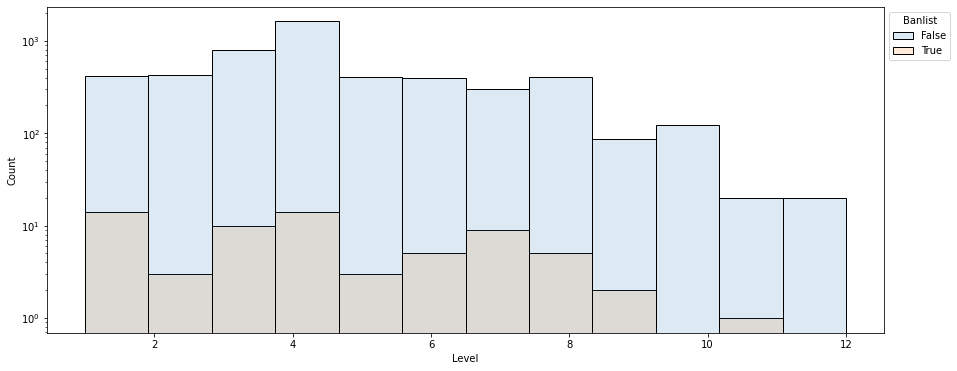

In [20]:
# Plot banlist vs mons lv
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
line_ban_lv = sns.histplot( data = mons_lv_ban, x = "Level", 
                          hue = "Banlist", #hue_order = ["Unlimited", "Semi-Limited", "Limited", "Forbidden"],
                         alpha = 0.15, bins = 12)
line_ban_lv.set_yscale("log")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [21]:
#Banlist vs ATK
ATK_ban = non_link_zero_mons[["ATK", "Banlist"]]
ATK_ban

,ATK,Banlist
0,1100.0,False
1,900.0,False
2,1400.0,False
5,0.0,False
7,1200.0,False
...,...,...
8320,1600.0,False
8321,1000.0,False
8322,1000.0,False
8323,2900.0,False


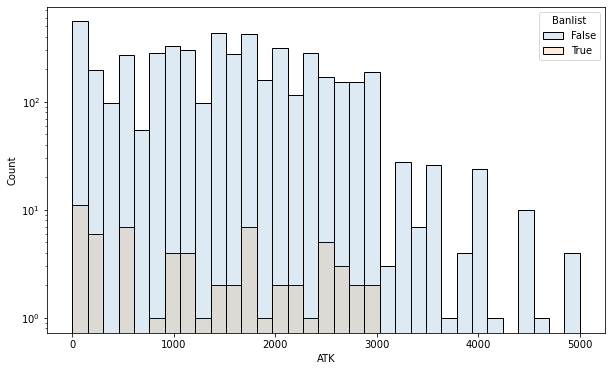

In [22]:
#Banlist vs ATK plot
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
atk_ban_plot = sns.histplot( data = ATK_ban, x = "ATK" ,hue = "Banlist", alpha = 0.15)
atk_ban_plot.set_yscale("log")

In [23]:
#Banlist vs DEF plot
DEF_ban = non_link_zero_mons[["DEF", "Banlist"]]
DEF_ban

,DEF,Banlist
0,1200.0,False
1,900.0,False
2,1600.0,False
5,3000.0,False
7,1200.0,False
...,...,...
8320,1800.0,False
8321,1000.0,False
8322,2000.0,False
8323,2000.0,False


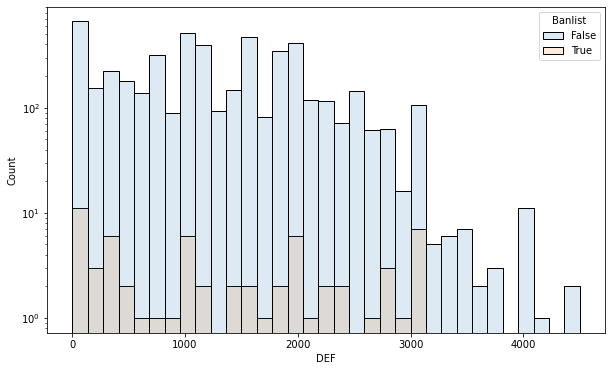

In [24]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
def_ban_plot = sns.histplot( data = DEF_ban, x = "DEF" ,hue = "Banlist", alpha = 0.15)
def_ban_plot.set_yscale("log")

<AxesSubplot:>

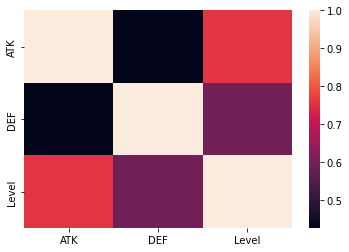

In [25]:
#potential heatmap ?
atk_def_lv = non_link_zero_mons[["ATK", "DEF", "Level"]]
atk_def = non_link_zero_mons[["ATK", "DEF",]]
sns.heatmap(atk_def_lv.corr())

In [26]:
non_link_zero_mons

,Card_set,Card_number,Rarity,Card_name,Card_type,Attribute,ATK,DEF,Level,Link_no,Property,M_type1,M_type2,M_type3,M_type4,E_type1,E_type2,E_type3,E_type4,E_type5,E_type6,E_type7,E_type8,E_type9,E_type10,TCG_Banlist,Banlist
0,Metal Raiders,MRD-116,Rare,Witch of the Black Forest,Monster,DARK,1100.0,1200.0,4.0,None,NaN,Spellcaster,Effect,None,None,Trigger,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
1,Photon Shockwave,PHSW-EN014,Common,Plasma Ball,Monster,LIGHT,900.0,900.0,3.0,None,NaN,Thunder,Effect,None,None,Continuous,Trigger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
2,Rise of the Duelist,ROTD-EN030,Ultra Rare,Koa'ki Meiru Supplier,Monster,EARTH,1400.0,1600.0,4.0,None,NaN,Rock,Effect,None,None,Trigger,Trigger,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
5,Duelist Alliance,DUEA-EN098,Common,Cloudcastle,Monster,WIND,0.0,3000.0,9.0,None,NaN,Machine,Synchro,Effect,None,Trigger,Continuous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
7,Cybernetic Revolution,CRV-EN006,Common,Patroid,Monster,EARTH,1200.0,1200.0,4.0,None,NaN,Machine,Effect,None,None,Ignition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8320,Dark Crisis,DCR-014,Rare,Des Feral Imp,Monster,DARK,1600.0,1800.0,4.0,None,NaN,Reptile,Flip,Effect,None,Flip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
8321,Duelist Alliance,DUEA-EN094,Common,Number 58: Burner Visor,Monster,FIRE,1000.0,1000.0,4.0,None,NaN,Pyro,Xyz,Effect,None,Ignition,Continuous-like,Trigger-like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
8322,The Dark Illusion,TDIL-EN004,Common,Performapal Inflater Tapir,Monster,WIND,1000.0,2000.0,6.0,None,NaN,Beast,Effect,None,None,Quick,Trigger,Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False
8323,Light of Destruction,LODT-EN039,Rare,"Simorgh, Bird of Ancestry",Monster,WIND,2900.0,2000.0,8.0,None,NaN,Winged Beast,Effect,None,None,Continuous,Trigger,Unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,False


In [27]:
#Try unsuper learning using all 4 banned type agglo 1_1
atk_def_lvl_sc = scale(atk_def_lv)
banlist_tcg = non_link_zero_mons["TCG_Banlist"]
le = preprocessing.LabelEncoder()
label1_1 = le.fit_transform(banlist_tcg)
model1_1 = cluster.AgglomerativeClustering(n_clusters = 4, linkage = "average")# affinity='cosine'
model1_1.fit(atk_def_lvl_sc)
print("Completeness score", metrics.completeness_score(label1_1, model1_1.labels_))
print("Homogeneity score", metrics.homogeneity_score(label1_1, model1_1.labels_))
print("silhouette score", metrics.silhouette_score(atk_def_lvl_sc, model1_1.labels_))
#plot_model1_1 = linkage(atk_def_lvl_sc, method = "ward")
#plt.figure(figsize=(20,12))
#dendrogram(plot_model1_1, labels = model1_1.labels_,
          #leaf_rotation = 90,
          #leaf_font_size = 5)
#plt.show()

Completeness score 0.0010876177525959948
Homogeneity score 0.007342240265148864
silhouette score 0.3366195739061134


In [28]:
atk_def_lvl_sc = scale(atk_def_lv)
banlist_tcg = non_link_zero_mons["TCG_Banlist"]
le = preprocessing.LabelEncoder()
label1_1 = le.fit_transform(banlist_tcg)
model1_1 = cluster.AgglomerativeClustering(n_clusters = 4, linkage = "ward", affinity='euclidean')
model1_1.fit(atk_def_lvl_sc)
print("Completeness score", metrics.completeness_score(label1_1, model1_1.labels_))
print("Homogeneity score", metrics.homogeneity_score(label1_1, model1_1.labels_))
print("silhouette score", metrics.silhouette_score(atk_def_lvl_sc, model1_1.labels_))



Completeness score 0.0010973061866718984
Homogeneity score 0.01903767544300106
silhouette score 0.30974918438078997


In [29]:
atk_def_lvl_sc = scale(atk_def_lv)
banlist_tcg = non_link_zero_mons["TCG_Banlist"]
le = preprocessing.LabelEncoder()
label1_1 = le.fit_transform(banlist_tcg)
model1_1 = cluster.AgglomerativeClustering(n_clusters = 4, linkage = "complete", affinity='euclidean')
model1_1.fit(atk_def_lvl_sc)
print("Completeness score", metrics.completeness_score(label1_1, model1_1.labels_))
print("Homogeneity score", metrics.homogeneity_score(label1_1, model1_1.labels_))
print("silhouette score", metrics.silhouette_score(atk_def_lvl_sc, model1_1.labels_))

Completeness score 0.0013346836030571436
Homogeneity score 0.01507445993236839
silhouette score 0.2736658085505683


In [30]:
atk_def_lvl_sc = scale(atk_def_lv)
banlist_tcg = non_link_zero_mons["TCG_Banlist"]
le = preprocessing.LabelEncoder()
label1_1 = le.fit_transform(banlist_tcg)
model1_1 = cluster.AgglomerativeClustering(n_clusters = 4, linkage = "average", affinity='manhattan')
model1_1.fit(atk_def_lvl_sc)
print("Completeness score", metrics.completeness_score(label1_1, model1_1.labels_))
print("Homogeneity score", metrics.homogeneity_score(label1_1, model1_1.labels_))
print("silhouette score", metrics.silhouette_score(atk_def_lvl_sc, model1_1.labels_))

Completeness score 0.0012960797544085021
Homogeneity score 0.00905197947968368
silhouette score 0.37906987951909377


In [31]:
atk_def_lvl_sc = scale(atk_def_lv)
banlist_tcg = non_link_zero_mons["TCG_Banlist"]
le = preprocessing.LabelEncoder()
label1_1 = le.fit_transform(banlist_tcg)
model1_1 = cluster.AgglomerativeClustering(n_clusters = 4, linkage = "complete", affinity='manhattan')
model1_1.fit(atk_def_lvl_sc)
print("Completeness score", metrics.completeness_score(label1_1, model1_1.labels_))
print("Homogeneity score", metrics.homogeneity_score(label1_1, model1_1.labels_))
print("silhouette score", metrics.silhouette_score(atk_def_lvl_sc, model1_1.labels_))

Completeness score 0.0037001739743176354
Homogeneity score 0.018955118973553217
silhouette score 0.25078100196555997


In [32]:
a_c = {"Cluster_type": ["Average_euclidean", "Average_euclidean", "Average_euclidean", 
                       "Ward_euclidean","Ward_euclidean","Ward_euclidean",
                       "Complete_eucildean","Complete_eucildean","Complete_eucildean",
                       "Average_manhattan","Average_manhattan","Average_manhattan",
                       "Complete_manhattan","Complete_manhattan","Complete_manhattan",],
      "Score_type" : ["Completeness_score", "Homogeneity_score", "Silhouette_score",
                      "Completeness_score", "Homogeneity_score", "Silhouette_score",
                      "Completeness_score", "Homogeneity_score", "Silhouette_score",
                      "Completeness_score", "Homogeneity_score", "Silhouette_score",
                      "Completeness_score", "Homogeneity_score", "Silhouette_score",],
      "Score" : [0.0010876177525959948, 0.007342240265148864, 0.3366195739061134,
                0.0010973061866718984, 0.01903767544300106, 0.30974918438078997,
                0.0006839381847860887, 0.01114970421688537, 0.12696646579601462,
                0.0012960797544085021, 0.00905197947968368, 0.37906987951909377,
                0.0037001739743176354, 0.018955118973553217, 0.25078100196555997]}
agglo_cluster = pd.DataFrame(a_c)
agglo_cluster

,Cluster_type,Score_type,Score
0,Average_euclidean,Completeness_score,0.001088
1,Average_euclidean,Homogeneity_score,0.007342
2,Average_euclidean,Silhouette_score,0.336620
3,Ward_euclidean,Completeness_score,0.001097
4,Ward_euclidean,Homogeneity_score,0.019038
5,Ward_euclidean,Silhouette_score,0.309749
6,Complete_eucildean,Completeness_score,0.000684
7,Complete_eucildean,Homogeneity_score,0.011150
8,Complete_eucildean,Silhouette_score,0.126966
9,Average_manhattan,Completeness_score,0.001296


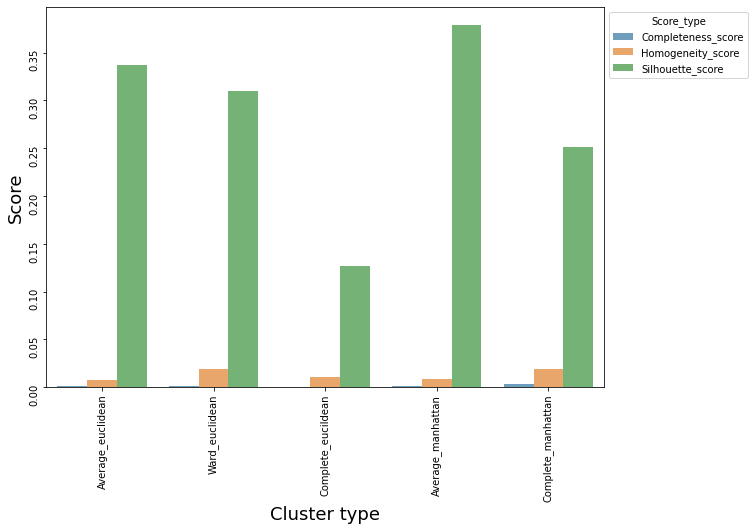

In [33]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10),
a1_plot = sns.barplot(x = "Cluster_type", y = "Score", data = agglo_cluster, hue = "Score_type" ,alpha = 0.7)
ax.tick_params(labelrotation=90)
#ax.set_title("Monster cards type count", size = 20)
ax.set_xlabel("Cluster type", size = 18)
ax.set_ylabel("Score" ,size = 18)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.bar_label(mct_plot)


In [34]:
#Try unsuper learning using all 4 banned type K - means
model2_1 = cluster.KMeans(n_clusters = 4)
model2_1.fit(atk_def_lvl_sc)
label2_1 = le.fit_transform(banlist_tcg)
label2_1_p = model2_1.predict(atk_def_lvl_sc)
print("Completeness score :", metrics.completeness_score(label2_1, label2_1_p))
print("Homogeneity score :", metrics.homogeneity_score(label2_1, label2_1_p))
print("Silhouette score :", metrics.silhouette_score(atk_def_lvl_sc, label2_1_p))
#plt.scatter(label2_1_p, label2_1)
#plt.show()

Completeness score : 0.0012257411899466307
Homogeneity score : 0.021641087240495013
Silhouette score : 0.35159263929547674


In [93]:
#try supervise logistic regression  4 banned types
from sklearn.linear_model import LogisticRegression
label1_1 = le.fit_transform(banlist_tcg)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
atk_def_lv
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(atk_def_lv, label1_1, test_size = 0.3)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predicted = lr.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))
print(le_name_mapping)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         9
           3       0.99      1.00      0.99      1488

    accuracy                           0.99      1509
   macro avg       0.33      0.33      0.33      1509
weighted avg       0.97      0.99      0.98      1509

[[   0    0   12]
 [   0    0    9]
 [   0    0 1488]]
{'Forbidden': 0, 'Limited': 1, 'Semi-Limited': 2, 'Unlimited': 3}


C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

DecisionTreeClassifier()


C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         1
           3       0.99      0.99      0.99      1487

    accuracy                           0.98      1509
   macro avg       0.25      0.25      0.25      1509
weighted avg       0.97      0.98      0.97      1509

[[   0    0    0   12]
 [   0    0    0    9]
 [   0    0    0    1]
 [  10    5    0 1472]]
{'Forbidden': 0, 'Limited': 1, 'Semi-Limited': 2, 'Unlimited': 3}


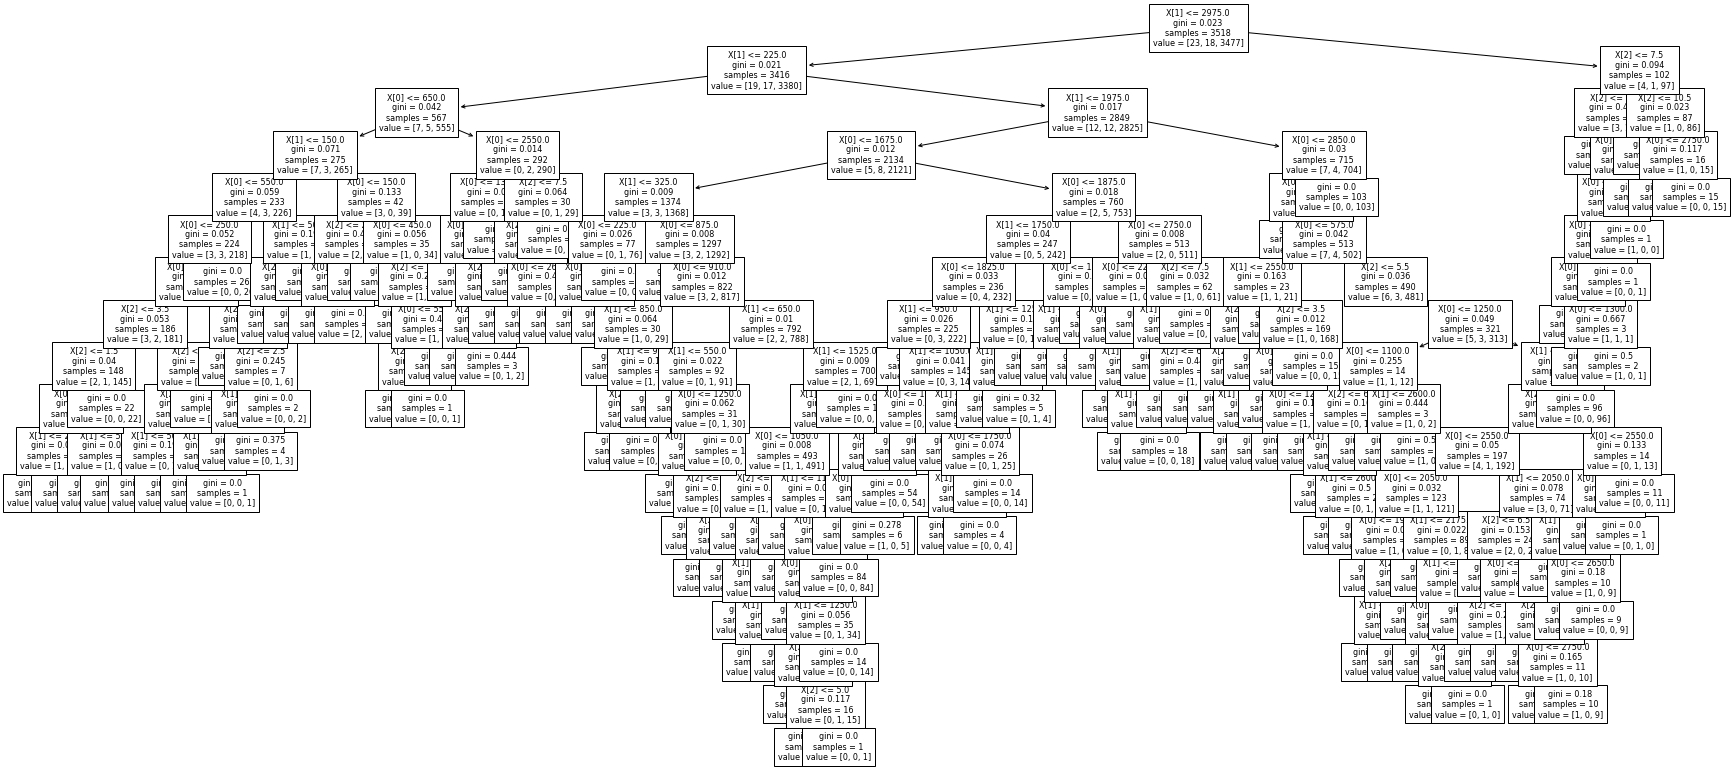

In [151]:
#try supervise decision tree  4 banned types
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
label1_1 = le.fit_transform(banlist_tcg)
atk_def_lv
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(atk_def_lv, label1_1, test_size = 0.30)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)
plt.figure(figsize=(30,14))
tree.plot_tree(model, fontsize = 8)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(le_name_mapping)

In [114]:
#try supervise K-near  4 banned types
from sklearn.neighbors import KNeighborsClassifier
label1_1 = le.fit_transform(banlist_tcg)
atk_def_lv
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(atk_def_lv, label1_1, test_size = 0.30)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(le_name_mapping)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         8
           3       0.99      1.00      1.00      1494

    accuracy                           0.99      1509
   macro avg       0.33      0.33      0.33      1509
weighted avg       0.98      0.99      0.99      1509

[[   0    0    7]
 [   0    0    8]
 [   0    0 1494]]
{'Forbidden': 0, 'Limited': 1, 'Semi-Limited': 2, 'Unlimited': 3}


C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#try supervise Naïve Bayes 4 banned types
from sklearn.naive_bayes import GaussianNB
label1_1 = le.fit_transform(banlist_tcg)
atk_def_lv
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(atk_def_lv, label1_1, test_size = 0.30)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(le_name_mapping)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         0
           3       0.99      1.00      0.99      1492

    accuracy                           0.99      1509
   macro avg       0.25      0.25      0.25      1509
weighted avg       0.98      0.99      0.98      1509

[[   0    0    0    8]
 [   0    0    0    9]
 [   0    0    0    0]
 [   1    0    2 1489]]
{'Forbidden': 0, 'Limited': 1, 'Semi-Limited': 2, 'Unlimited': 3}


C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akarin\anaconda3\lib\site-packages\sklearn\metrics\

In [152]:
from platform import python_version

print(python_version())

3.9.12
